# 1. Información inicial

**Challenge Telecom X**

Análisis de evasión de clientes (Churn de clientes)

**Objetivo:**

Buscar, tratar y realizar un análisis exploratorio de los datos de la empresa. Es decir, todo el proceso ETL.



# 2. Extracción

In [30]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2.1 Carga archivo json desde API

In [31]:
url = "https://raw.githubusercontent.com/Karen-13C/Challenge_Proceso_ETL/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)

telecom = response.json() 
telecom = pd.json_normalize(telecom, sep='_')
# Quita los prefijos: customer_, phone_, etc.
telecom.columns = [col.split('_')[-1] for col in telecom.columns]

df_telecom = pd.DataFrame(telecom)
df_telecom.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 2.2 Revisa nulos

In [32]:
df_telecom.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

# 3. Transformación

## 3.1 Tipos de datos del conjunto

### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [33]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## 3.2 Conversión de columnas

### 3.2.1 Convertir columna ```Churn``` en bool

In [34]:
df_telecom['Churn'] = df_telecom['Churn'].map({'Yes':True, 'No':False}).astype(bool)
df_telecom['Churn'].dtypes

dtype('bool')

### 3.2.2 Convertir columna ```SeniorCitizen``` en bool

In [35]:
df_telecom['SeniorCitizen'] = df_telecom['SeniorCitizen'].map({0:False, 1:True}).astype(bool)
df_telecom['SeniorCitizen'].dtypes

dtype('bool')

### 3.2.3 Convertir el resto de columnas con yes, no en bool
```Partner, Dependents, PhoneService, MultipleLines, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling```

In [36]:
cols_a_Bool = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', \
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
df_telecom[cols_a_Bool] = df_telecom[cols_a_Bool].map(lambda x: True if x == 'Yes' else False).astype(bool)

### 3.2.4 Convertir columna ```Total``` en float

In [37]:
df_telecom['Total'] = pd.to_numeric(df_telecom['Total'], errors='coerce')
df_telecom['Total'].dtypes

dtype('float64')

## 3.3 Revisa si hay duplicados

In [38]:
df_telecom[df_telecom.duplicated()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total


No hay duplicados

## 3.4 Revisa si hay nulos

In [39]:
df_telecom.isnull().sum()

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Monthly              0
Total               11
dtype: int64

In [40]:
df_telecom[df_telecom['Total'].isnull()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
975,1371-DWPAZ,False,Female,False,True,True,0,False,False,DSL,...,True,True,True,True,False,Two year,False,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,False,Female,False,True,True,0,True,False,No,...,False,False,False,False,False,Two year,False,Mailed check,20.00,NaN
1955,2775-SEFEE,False,Male,False,False,True,0,True,True,DSL,...,True,False,True,False,False,Two year,True,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,False,Male,False,True,True,0,True,False,No,...,False,False,False,False,False,One year,True,Mailed check,19.70,NaN
2232,3115-CZMZD,False,Male,False,False,True,0,True,False,No,...,False,False,False,False,False,Two year,False,Mailed check,20.25,NaN
2308,3213-VVOLG,False,Male,False,True,True,0,True,True,No,...,False,False,False,False,False,Two year,False,Mailed check,25.35,NaN
2930,4075-WKNIU,False,Female,False,True,True,0,True,True,DSL,...,True,True,True,True,False,Two year,False,Mailed check,73.35,NaN
3134,4367-NUYAO,False,Male,False,True,True,0,True,True,No,...,False,False,False,False,False,Two year,False,Mailed check,25.75,NaN
3203,4472-LVYGI,False,Female,False,True,True,0,False,False,DSL,...,False,True,True,True,False,Two year,True,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,False,Female,False,True,True,0,True,False,DSL,...,True,True,False,True,True,Two year,False,Mailed check,80.85,NaN


In [41]:
df_telecom.dropna(inplace=True)
df_telecom.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Monthly             0
Total               0
dtype: int64

## 3.4 Creación columna ```Cuentas_diarias```

In [42]:
df_telecom['Cuentas_diarias'] = round(df_telecom['Monthly']/30, 2)
df_telecom[['Monthly', 'Cuentas_diarias']]

,Monthly,Cuentas_diarias
0,65.60,2.19
1,59.90,2.00
2,73.90,2.46
3,98.00,3.27
4,83.90,2.80
...,...,...
7262,55.15,1.84
7263,85.10,2.84
7264,50.30,1.68
7265,67.85,2.26


# 4. Carga y análisis

## 4.1 Análisis descriptivo

In [43]:
df_telecom.describe()

,tenure,Monthly,Total,Cuentas_diarias
count,7256.000000,7256.000000,7256.000000,7256.000000
mean,32.395535,64.755423,2280.634213,2.158467
std,24.558067,30.125739,2268.632997,1.004282
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.450000,400.225000,1.180000
50%,29.000000,70.300000,1391.000000,2.340000
75%,55.000000,89.900000,3785.300000,3.000000
max,72.000000,118.750000,8684.800000,3.960000


## 4.2 Distribución de evasión variables categóricas

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

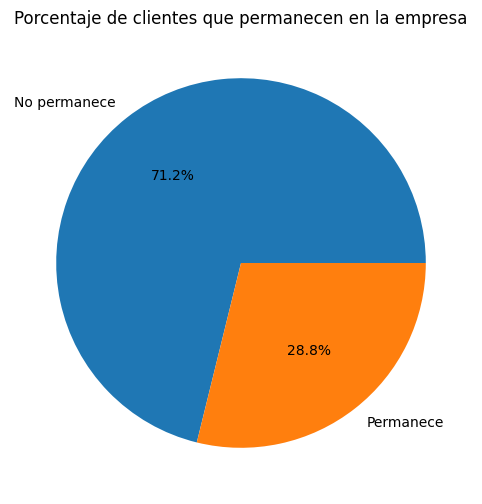

In [44]:
etiquetas = {True: 'Permanece', False: 'No permanece'}
col_Churn = df_telecom['Churn'].map(etiquetas)

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(col_Churn.value_counts(),labels=col_Churn.value_counts().index, autopct='%1.1f%%')

ax.set_title('Porcentaje de clientes que permanecen en la empresa')

plt.show()

### 4.2.1 Distribución de evasión por género

In [45]:
col_Churn_genero = df_telecom.groupby('Churn')['gender'].value_counts()
col_Churn_genero

Churn  gender
False  Male      2619
       Female    2544
True   Male      1050
       Female    1043
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

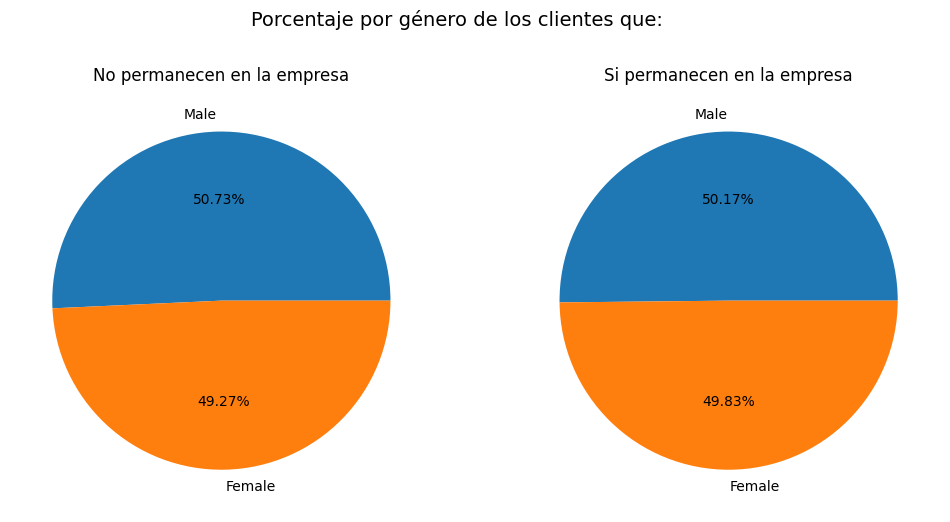

In [46]:
churn_false_data = col_Churn_genero.loc[False]
churn_true_data = col_Churn_genero.loc[True]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle('Porcentaje por género de los clientes que: ', fontsize=14)

ax[0].set_title('No permanecen en la empresa')
ax[0].pie(churn_false_data,labels=churn_false_data.index, autopct='%.2f%%')

ax[1].set_title('Si permanecen en la empresa')
ax[1].pie(churn_true_data, labels=churn_true_data.index, autopct='%.2f%%')

plt.show

### 4.2.2 Distribución de evasión por ```tipo de contrato (Contract)```

In [47]:
col_churn_contrato = df_telecom.groupby('Contract')['Churn'].value_counts().unstack()
col_churn_contrato


Churn,False,True
Contract,,
Month-to-month,2220,1785
One year,1306,212
Two year,1637,96


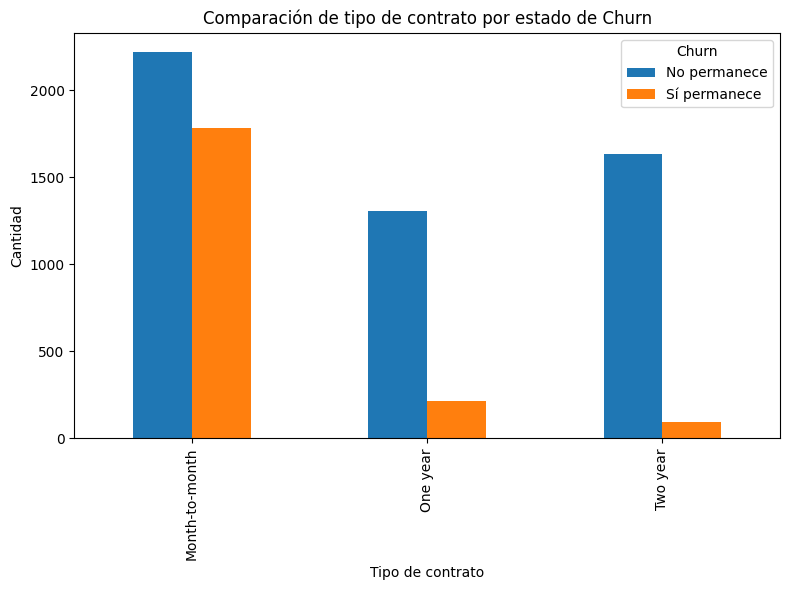

In [48]:
col_churn_contrato.plot(kind='bar', figsize=(8,6))

plt.title('Comparación de tipo de contrato por estado de Churn')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad')
plt.legend(title='Churn', labels=['No permanece', 'Sí permanece'])
plt.tight_layout()
plt.show()

### 4.2.3 Distribución de evasión por ```método de pago (PaymentMethod)```

In [49]:
col_churn_payment = df_telecom.groupby('PaymentMethod')['Churn'].value_counts().unstack()
col_churn_payment

Churn,False,True
PaymentMethod,,
Bank transfer (automatic),1284,303
Credit card (automatic),1289,278
Electronic check,1294,1151
Mailed check,1296,361


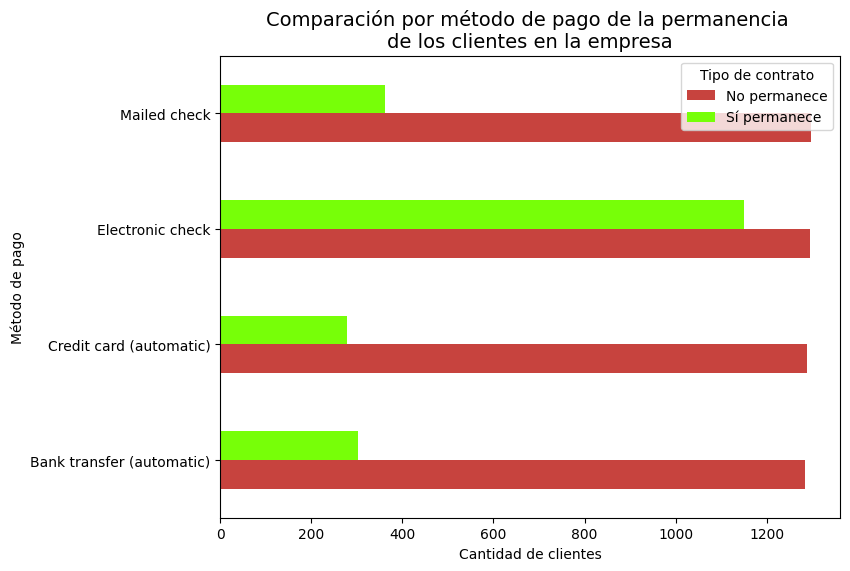

In [50]:
#colores = sns.color_palette('hls', n_colors=2)
colores = ["#c7433e", "#77ff08"]
col_churn_payment.plot(kind='barh', figsize=(8,6), color=[colores[0], colores[1]])

plt.title('Comparación por método de pago de la permanencia \nde los clientes en la empresa', fontsize=14)
plt.ylabel('Método de pago')
plt.xlabel('Cantidad de clientes')
plt.legend(title='Tipo de contrato', labels=('No permanece', 'Sí permanece'))

plt.show()

## 4.3 Distribución de evasión variables numéricas

### 4.3.1 Distribución de evasión por total gastado

In [51]:
# Crea rangos y etiquetas
bins = list(range(0, 10000, 1000))
labels = [f'{bins[i]}–{bins[i+1]-1}' for i in range(len(bins)-1)]

# Crea el dataframe con las columnas que requiero
churn_total = pd.DataFrame(df_telecom[['Churn', 'Total']])

# Crea columna extra de rangos
churn_total['rango'] = pd.cut(churn_total['Total'], bins=bins, labels=labels, right=False)

# Cuenta cuántos valores hay en cada rango y los agrupa por churn
conteo_rangos = churn_total.groupby(['rango', 'Churn'], observed=True).size().unstack(fill_value=0)
conteo_rangos


Churn,False,True
rango,,
0–999,1823,1170
1000–1999,1014,311
2000–2999,472,198
3000–3999,449,120
4000–4999,427,95
5000–5999,374,86
6000–6999,310,68
7000–7999,219,39
8000–8999,75,6


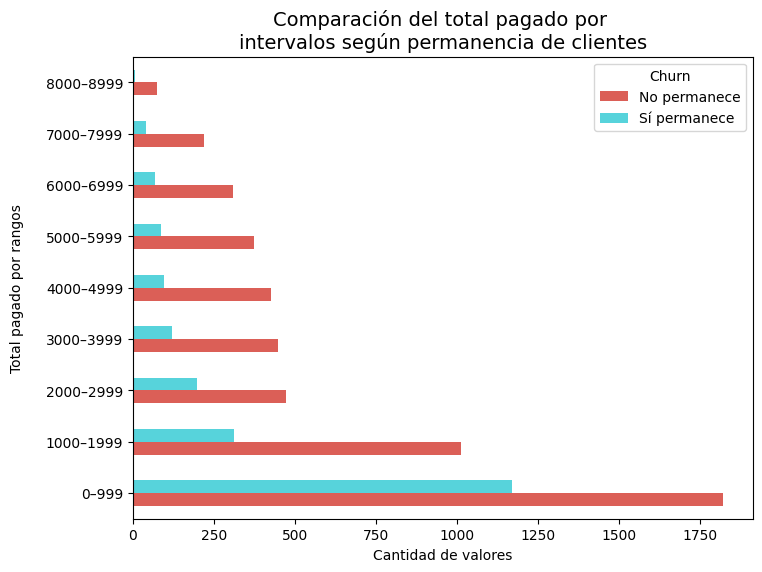

In [52]:
colores = sns.color_palette('hls', n_colors=2)
conteo_rangos.plot(kind='barh', figsize=(8,6), color=colores)

plt.title('Comparación del total pagado por \nintervalos según permanencia de clientes', fontsize=14)
plt.ylabel('Total pagado por rangos\n')
plt.xlabel('Cantidad de valores')
plt.legend(title='Churn', labels=('No permanece', 'Sí permanece'))

plt.show()

### 4.3.2 Distribución de evasión por ```tiempo de contrato```

In [53]:
churn_tiempo_contrato = df_telecom[['Churn', 'tenure']]
churn_tiempo_contrato.groupby('Churn')['tenure'].value_counts()

Churn  tenure
False  72        356
       1         233
       71        164
       2         115
       70        108
                ... 
True   45          8
       62          8
       60          7
       64          7
       63          5
Name: count, Length: 144, dtype: int64

In [54]:
churn_tiempo_contrato.groupby(['Churn', 'tenure']).size()

Churn  tenure
False  1         233
       2         115
       3         106
       4          93
       5          69
                ... 
True   68         13
       69         13
       70         14
       71         12
       72         13
Length: 144, dtype: int64

In [55]:
churn_tiempo_contrato.groupby(['Churn', 'tenure']).size().unstack(0)

Churn,False,True
tenure,,
1,233,401
2,115,131
3,106,101
4,93,92
5,69,69
...,...,...
68,91,13
69,87,13
70,108,14


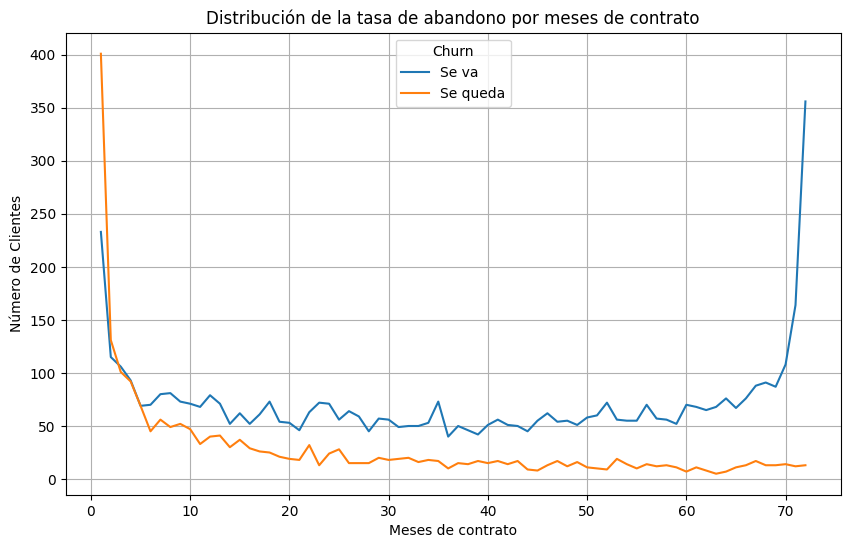

In [56]:
# Agrupa y cuenta
churn_tiempo_contrato = churn_tiempo_contrato.groupby(['Churn', 'tenure']).size().unstack(0).fillna(0)

# Ordena por tenure
churn_tiempo_contrato = churn_tiempo_contrato.sort_index()

churn_tiempo_contrato.plot(kind='line', figsize=(10,6))

plt.title('Distribución de la tasa de abandono por meses de contrato')
plt.xlabel('Meses de contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=('Se va', 'Se queda'))
plt.grid(True)
plt.show()


# 5. Informe final

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

## 5.1 Introducción

El **objetivo del análisis** es saber si la cantidad de clientes que dejan la empresa es mayor a la cantidad de clientes que se quedan, así como el posible motivo por el que la dejan.

El **churn** puede ser definido como: "tasa de abandono".

**¿Por qué se aborda el problema?**

Porque el propósito de toda empresa es crecer, colocarse en una buena posición en el mercado, por lo tanto el hecho de tener una tasa de abandono más alta que la de permanencia es un problema que es necesario abordar lo más pronto posible.

## 5.2 Limpieza y tratamiento de datos

Se ha **importado** desde la API  de github el archivo de datos, aunque por estar en la misma carpeta también se puede importar con un read_json.

Luego se revisa si hay **valores nulos**, en apariencia no habían, pero luego al revisar con info se descubre que los datos están en su mayoría como object, lo cual no permite contabilizar de forma correcta si hay nulos por ser strings.

Así que se procede a **convertir** las columnas a los tipos correspondientes, es decir las columnas con valores flotantes se convierten a flotantes, y otras columnas con strings pero de tipo 'yes', 'no' se convierten a booleanas para ser trabajadas más facilmente.

Estos cambios permitieron saber que la columna de 'Total' contaba con 11 filas de **valores nulos**, por lo que se eliminaron porque no había forma de verificar cuales eran los datos correctos, además se verificó la columna de 'tenure' que corresponde a meses de contrato del cliente, y estaban en cero las 11 filas, por lo que se confirmó la necesidad de eliminar dichas filas.

Y así concluyó el proceso de limpieza y tratamiento de los datos.

## 5.3 Análisis exploratorio de los datos

### Análisis descriptivo

En el análisis descriptivo se realiza un describe, que permite visualizar la siguiente tabla:

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>tenure</th>
      <th>Monthly</th>
      <th>Total</th>
      <th>Cuentas_diarias</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>7256.000000</td>
      <td>7256.000000</td>
      <td>7256.000000</td>
      <td>7256.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>32.395535</td>
      <td>64.755423</td>
      <td>2280.634213</td>
      <td>2.158467</td>
    </tr>
    <tr>
      <th>std</th>
      <td>24.558067</td>
      <td>30.125739</td>
      <td>2268.632997</td>
      <td>1.004282</td>
    </tr>
    <tr>
      <th>min</th>
      <td>1.000000</td>
      <td>18.250000</td>
      <td>18.800000</td>
      <td>0.610000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>9.000000</td>
      <td>35.450000</td>
      <td>400.225000</td>
      <td>1.180000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>29.000000</td>
      <td>70.300000</td>
      <td>1391.000000</td>
      <td>2.340000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>55.000000</td>
      <td>89.900000</td>
      <td>3785.300000</td>
      <td>3.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>72.000000</td>
      <td>118.750000</td>
      <td>8684.800000</td>
      <td>3.960000</td>
    </tr>
  </tbody>
</table>
</div>

El análisis descriptivo solo trabaja sobre las columnas con valores numéricos, por lo que la fila **count** permite verificar que todas las columnas tienen la misma cantidad de datos 7256.

La fila **mean** corresponde al promedio o valor central en los datos, en el caso de:
1. tenure: en promedio el tiempo de contrato es de 32 meses.
2. Monthly: en promedio los clientes por mes pagan $64.7 por el total de todos los servicios contratados.
3. Total: en promedio el total gastado por los clientes desde que iniciaron sus contratos es de $2280.6
4. Cuentas_diarias: en promedio diariamente los clientes gastan $2.15 en sus servicios.

La fila **std** se refiere a la desviación estandar, representa qué tanto se dispersan los valores con respecto al promedio. Para comprender mejor este dato se puede utilizar para calcular el **coeficiente de variación (CV)** este nos ayudará a interpretar mejor la variabilidad.
1. Según ```cv_tenure``` el coeficiente de variación sobre los meses de contrato es de 75.8%, esto indica que: 
    * la empresa cuenta con clientes que contratan por muy poco tiempo, y otros por mucho tiempo. Al ser tan variable es más dificil predecir el flujo de ingresos futuros. 
    * También puede señalar la necesidad de estrategias para la retención, es decir: crear incentivos para la renovación en contratos cortos, y en el caso de los contratos largo centrarse en el mantenimiento de la relación.
    * Por lo que esta variabilidad podría estar relacionada con las altas tasas de abandono.
2. Según ```cv_monthly``` la variación del total de cargos mensuales del total de servicios del cliente es de 46.5%, veamos lo que eto significa:
    * Si se desea que la empresa se base en suscripciones fijas, ese 46% represetaría que en realidad hay muchos cambios frecuentes en la contratación.
    * Pero si se desea que la empresa se base en servicios por consumo ese porcentaje es lo esperado.
3. Según ```cv_total``` la variabilidad del total gastado por el cliente es de 99.4%, por los valores anteriores es realmente esperable que sea un valor alto de variabilidad, pero analicemos lo que esto significa:
    * Sugiere que solo una pequeña fracción de los clientes contribuye de forma desproporcional al total, es decir que estos son los clientes de alto valor ya que permencen en el tiempo.
    * Este valor confirma la necesidad de segmentación y de estrategias de retención y mantenimiento.


Como recomendación general por los datos analizados hasta el momento, la empresa podría verse beneficiado por segmentar los tipos de contratos, es decir ofrecer paquetes de bajo valor para clientes que usen servicios básicos o con planes de entrada, y otros paquetes de alto valor para clientes con múltiples servicios, planes premium o con alto volumen de consumo. Es importante entender las necesidades de ambos grupo para mejorar la oferta de servicios.

In [57]:
# cv = (desviación estándar / promedio)*100 
# cv = (std / mean)*100
cv_tenure = (24.558/32.395)*100
print('Coeficiente de variación de tenure', cv_tenure)

cv_monthly = (30.125/64.755)*100
print('Coeficiente de variación de Monthly', cv_monthly)

cv_total = (2268.632/2280.634)*100
print('Coeficiente de variación de Total', cv_total)

cv_cuentas_diarias = (1.004/2.158)*100
print('Coeficiente de variación de Cuentas_diarias', cv_cuentas_diarias)

Coeficiente de variación de tenure 75.80799506096619
Coeficiente de variación de Monthly 46.521504130955144
Coeficiente de variación de Total 99.47374282765232
Coeficiente de variación de Cuentas_diarias 46.52455977757183


### Análisis sobre la tasa de abandono (churn)

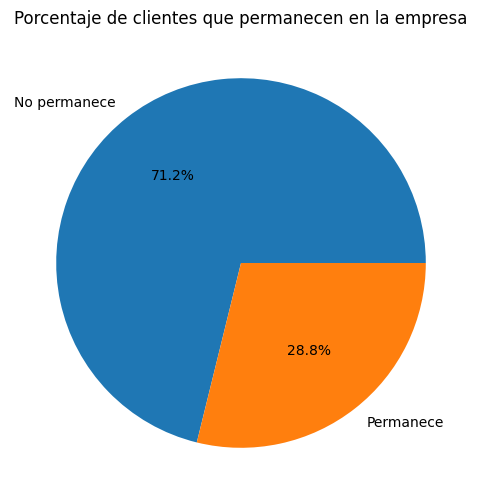

En el primer gráfico realizado se pudo observar el porentaje exacto de clientes que abandonan la empresa, que es un 71.2%, esto coincide con lo analizado anteriormente con el análisis descriptivo.

Se procede a analizar otras variables para tratar de hallar patrones por:
* Género
* Tipo de contrato
* Método de pago
* Total gastado
* Tiempo de contrato

### Análisis sobre la tasa de abandono por género

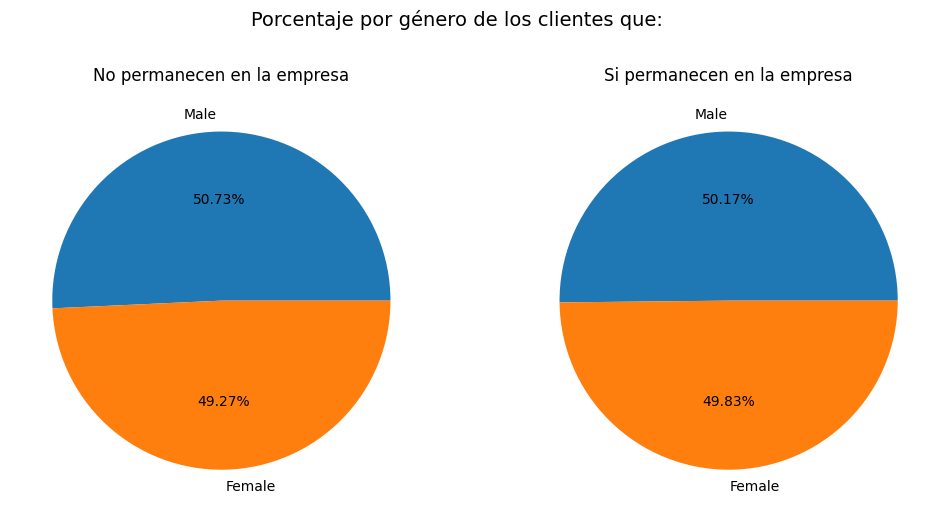

En el gráfico de la izquierda que representa la tasa de abandono, del total 71.2%, en realidad no hay una diferencia marcada entre hombres y mujeres, el 50.73% del total son hombres y el 49.27% son mujeres, por lo tanto no hay un patrón visible en que el género afecte en la tasa de abandono.

El gráfico de la derecha muestra la tasa de permanencia que correspondía al 28.8%, se puede ver que tampoco se hace una diferencia marcada entre el ser hombre o mujer.

Por lo tanto el género no hace diferencia entre el abandono o permanencia en la empresa.

### Análisis sobre la tasa de abandono por tipo de contrato

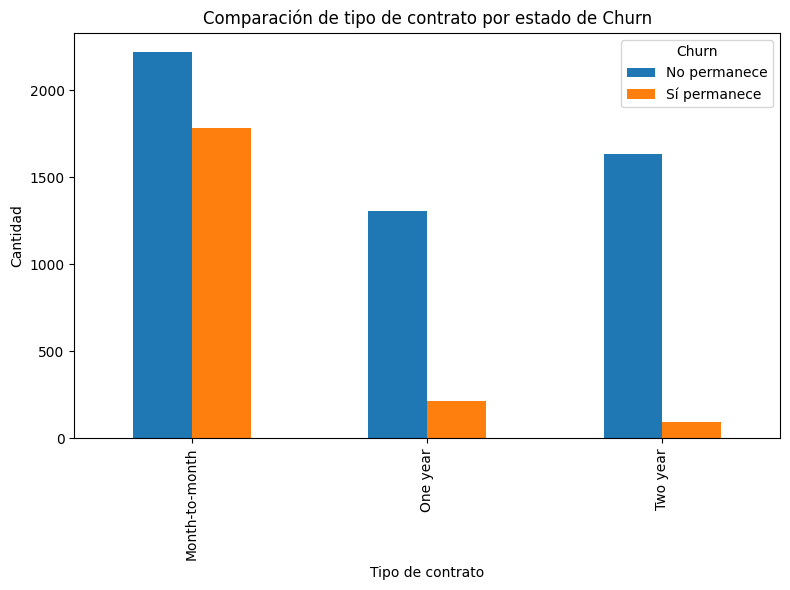

En este gráfico se puede observar que en los tipos de contrato siempre predomina la tasa de abanodno, lo cual es esperado ya que el abandono representa más del 70% de los datos.

Además de esto, es importante resaltar que en el tipo de contrato ```Month-to-month``` (mes a mes) es la única que posee una cantidad considerablemente alta de clientes que permanecen, por lo que se podría decir que es la opción favorita de la mayoría que ha decidiso quedarse.

### Análisis sobre la tasa de abandono por método de pago

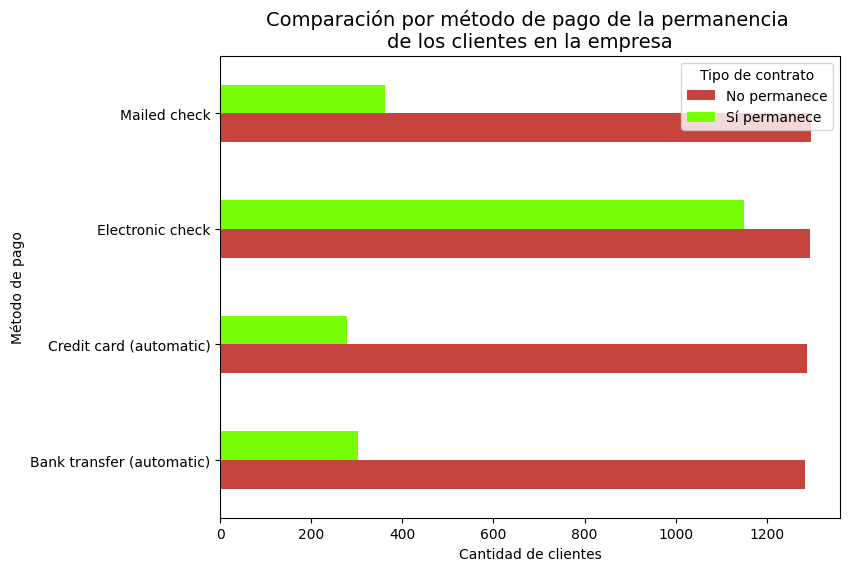

Sobre el gráfico se observa que realmente no hay una diferencia marcada para los que abandonan la empresa entre los métodos de pago, pero para quienes si se han quedado el más popular ha sido ```Electronik check``` seguido de lejos por ```Mailed check```. Por lo que esto podría ser una base para la reestructuración de los servicios

### Análisis sobre tasa de abandono por total pagado

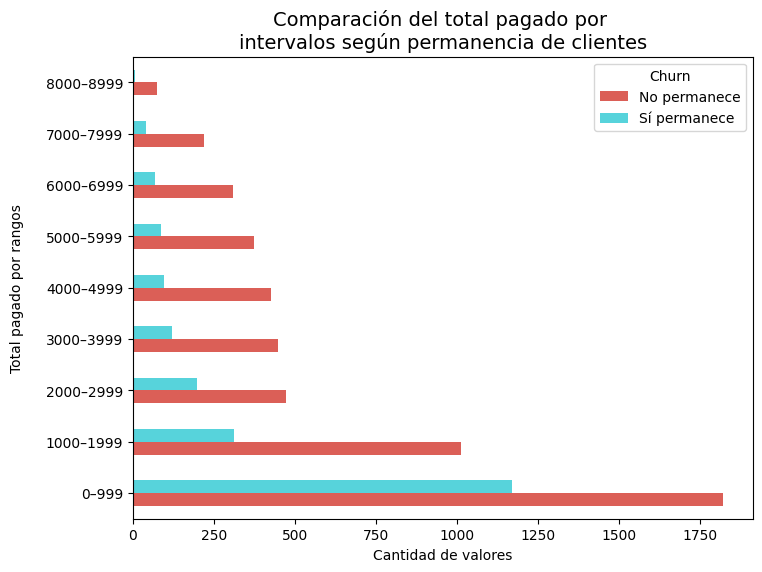

En este caso se puede observar que la tasa de abandono es mayor cuando el total pagado en menor a $1000, esto es coherente con el CV tan alto del 99.47% que observamos para el "Total", ya que indica que la mayoría de los clientes tienen un gasto total bajo mientras que unos pocos se extienden a rangos de gasto mucho más altos, siendo los que "mantienen" la empresa.

Por otra analizando los que permanecen también va disminuyendo conforme aumenta el total pagado, es decir que hay muchos que aunque hayan permancedido por cierto aún así dejan la empresa y por eso las barras que representan la tasa de abandono siempre son más largas que las que representan a los que se quedan.

### Análisis sobre la tasa de abandono por meses de contrato

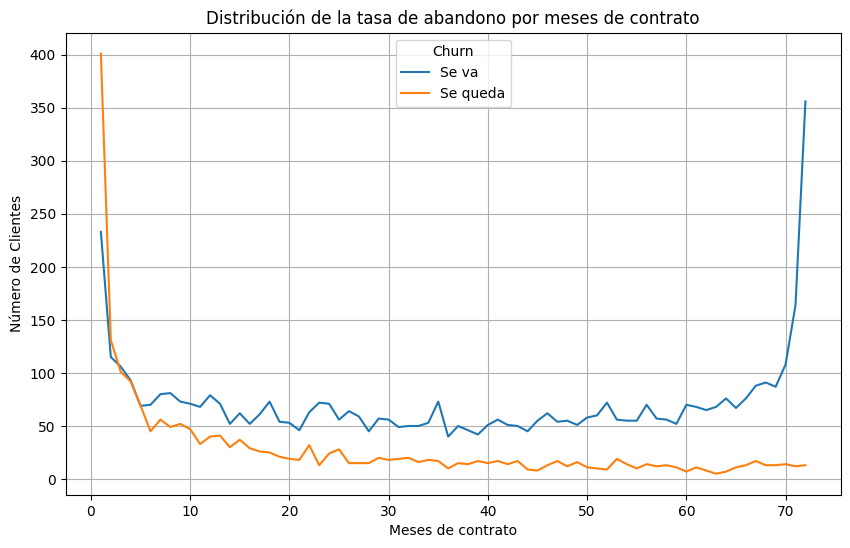

En este gráfico se puede observar lo mismo que en el anterior, que al inicio hay mucho abandono, de hecho la gráfica de línea anaranjada va tendiendo hacia abajo entre más tiempo ha pasado, por otra parte en la línea azul de tasa de abandono, denota una tendencia horizontal durante los meses intermedios, es decir que varía levemente hacia arriba o hacia abajo, lo que hace que se mantenga casi siempre en rangos similares, implicando que cada mes se van cantidades de clientes similares. 

Es importante destacar que durante los primeros 5 meses y los 65 últimos meses donde se denota un aumento considerable de abandono. Esto sugiere que, por un lado, una proporción significativa de clientes nuevos o con contratos de corta duración optan por abandonar después de un período inicial. Por otro lado, los clientes de mayor antigüedad o con contratos más largos también tienden a abandonar cuando finalizan sus ciclos de servicio extendidos, lo que contribuye al aumento del churn en la cola de la distribución.

## 5.4 Conclusiones e Insights